In [8]:
import pandas as pd
import matplotlib as pyplot

In [9]:
#HDI - Education
#Here we are taking the two variables that compose de Education HDI and calculating it by parts
#One thing to note is that the those variables are the ones with the interpolation of missing data made by UN

expected = pd.read_csv("expected_years.csv")
mean = pd.read_csv("mean_years.csv")

expected = expected.dropna(axis =1, how = "all")
mean = mean.dropna(axis =1, how = "all")

expected = expected.drop("HDI Rank (2018)", axis = 1)
mean = mean.drop("HDI Rank (2018)", axis = 1)

expected = pd.melt(expected, id_vars = ["Country"])
expected = expected.rename(columns = {"value" : "expected"})

mean = pd.melt(mean, id_vars = ["Country"])
mean = mean.rename(columns = {"value" : "mean"})

education_hdi_calc = pd.merge(expected, mean, on = ["Country", "variable"])

education_hdi_calc["expected"] = pd.to_numeric(education_hdi_calc["expected"], errors = "coerce")/18
education_hdi_calc["mean"] =  pd.to_numeric(education_hdi_calc["mean"], errors = "coerce")/15
education_hdi_calc["expected"] = education_hdi_calc["expected"].clip(0,1)
education_hdi_calc["mean"] = education_hdi_calc["mean"].clip(0,1)

education_hdi_calc["education_hdi"] = education_hdi_calc[['expected', 'mean']].mean(axis=1)
education_hdi_calc = education_hdi_calc.dropna()

education_hdi_calc["country"] = education_hdi_calc["Country"]
education_hdi_calc["year"] = education_hdi_calc["variable"]
education_hdi_calc.year = education_hdi_calc.year.astype(int)

education_hdi_calc.set_index(["country", "year"], inplace = True)
#education_hdi_calc = pd.DataFrame(education_hdi_calc["education_hdi"])
#education_hdi_calc.reset_index(inplace = True)

In [10]:
#Now we take the already calculated Education HDI

education_hdi = pd.read_csv("education_hdi.csv", sep =";")
education_hdi = education_hdi.dropna(axis =1, how = "all")
education_hdi = education_hdi.drop("HDI Rank (2018)", axis = 1)
education_hdi = pd.melt(education_hdi, id_vars = ["Country"])
education_hdi = education_hdi.rename(columns = {"value" : "true_hdi"})
education_hdi = pd.merge(education_hdi, education_hdi_calc, on = ["Country", "variable"])
education_hdi["true_hdi"] = education_hdi["true_hdi"].astype("float")

In [11]:
#here is a simple scatter plot between the two, indicating the correspondence
education_hdi[education_hdi["variable"] == "2018"].plot(x='true_hdi', y='education_hdi', style='o')


# Creating the Index

In [12]:
### importing packages

import pandas as pd
import matplotlib as pyplot


In [13]:
###database
coucodes = pd.read_csv("CountryCodes.csv", sep = ";")
countries = coucodes["ISO Code"].tolist()

In [14]:
## importing education database

education = pd.read_csv('Education_codes.csv', header = 0)
education = education["index"].tolist()
education

['HD.HCI.EYRS',
 'HD.HCI.EYRS.FE',
 'HD.HCI.EYRS.MA',
 'SE.XPD.TOTL.GD.ZS',
 'SE.PRE.ENRR',
 'UIS.GER.12',
 'SE.SEC.ENRR',
 'SE.TER.ENRR',
 'SE.ADT.LITR.ZS',
 'UIS.EA.MEAN.1T6.AG25T99',
 'SE.SCH.LIFE.FE',
 'SE.SCH.LIFE.MA',
 'IT.NET.EDUC.ZS',
 'SE.SEC.CUAT.UP.ZS',
 'SE.SEC.CUAT.UP.FE.ZS',
 'SE.SEC.CUAT.UP.MA.ZS',
 'SE.PRM.DROP.ZS',
 'SE.PRM.TCAQ.ZS',
 'LO.PISA.MAT',
 'LO.PISA.REA',
 'LO.PISA.SCI',
 'SE.PRM.ENRL.TC.ZS',
 'UIS.SR.2.GPV.GLAST.CP.T',
 'SE.SCH.LIFE',
 'BAR.SCHL.25UP']

In [63]:
#downloading data from worldbank

import pandas_datareader
from pandas_datareader import wb

worldbank_data = pandas_datareader.wb.download(indicator = education, country = countries, start = 2010, end = 2020, freq = "A")
worldbank_data2 = pandas_datareader.wb.download(indicator = education, country = countries, start = 2000, end = 2009, freq = "A")
worldbank_data3 = pandas_datareader.wb.download(indicator = education, country = countries, start = 1990, end = 1999, freq = "A")

worldbank_data = pd.concat([worldbank_data, worldbank_data2])
worldbank_data = pd.concat([worldbank_data, worldbank_data3])



In [73]:
worldbank_data_idx = worldbank_data.reset_index()

#from pupil to teacher to teacher to pupil
worldbank_data_idx["SE.PRM.ENRL.TC.ZS"] = 1/worldbank_data_idx["SE.PRM.ENRL.TC.ZS"]

#And school dropout

worldbank_data_idx["SE.PRM.DROP.ZS"] = 1/worldbank_data_idx["SE.PRM.DROP.ZS"]

#Mean PISA scores due to high correlation

worldbank_data_idx["LO.PISA"] = (worldbank_data_idx["LO.PISA.MAT"]+worldbank_data_idx["LO.PISA.REA"]+worldbank_data_idx["LO.PISA.SCI"])/3


#and create a gender education variable

worldbank_data_idx["gender_ratio1"] = worldbank_data_idx["SE.SCH.LIFE.FE"]/worldbank_data_idx["SE.SCH.LIFE.MA"] 
worldbank_data_idx["gender_ratio2"] = worldbank_data_idx["SE.SEC.CUAT.UP.FE.ZS"]/worldbank_data_idx["SE.SEC.CUAT.UP.MA.ZS"]
worldbank_data_idx["gender_ratio"] =worldbank_data_idx[["gender_ratio1","gender_ratio2"]].mean(axis = 1)


worldbank_data_idx = worldbank_data_idx.drop(["SE.SCH.LIFE.FE", "LO.PISA.MAT", "LO.PISA.REA", "LO.PISA.SCI", "SE.SCH.LIFE.MA", "SE.SEC.CUAT.UP.MA.ZS", "SE.SEC.CUAT.UP.FE.ZS", "gender_ratio1", "gender_ratio2"], axis=1)

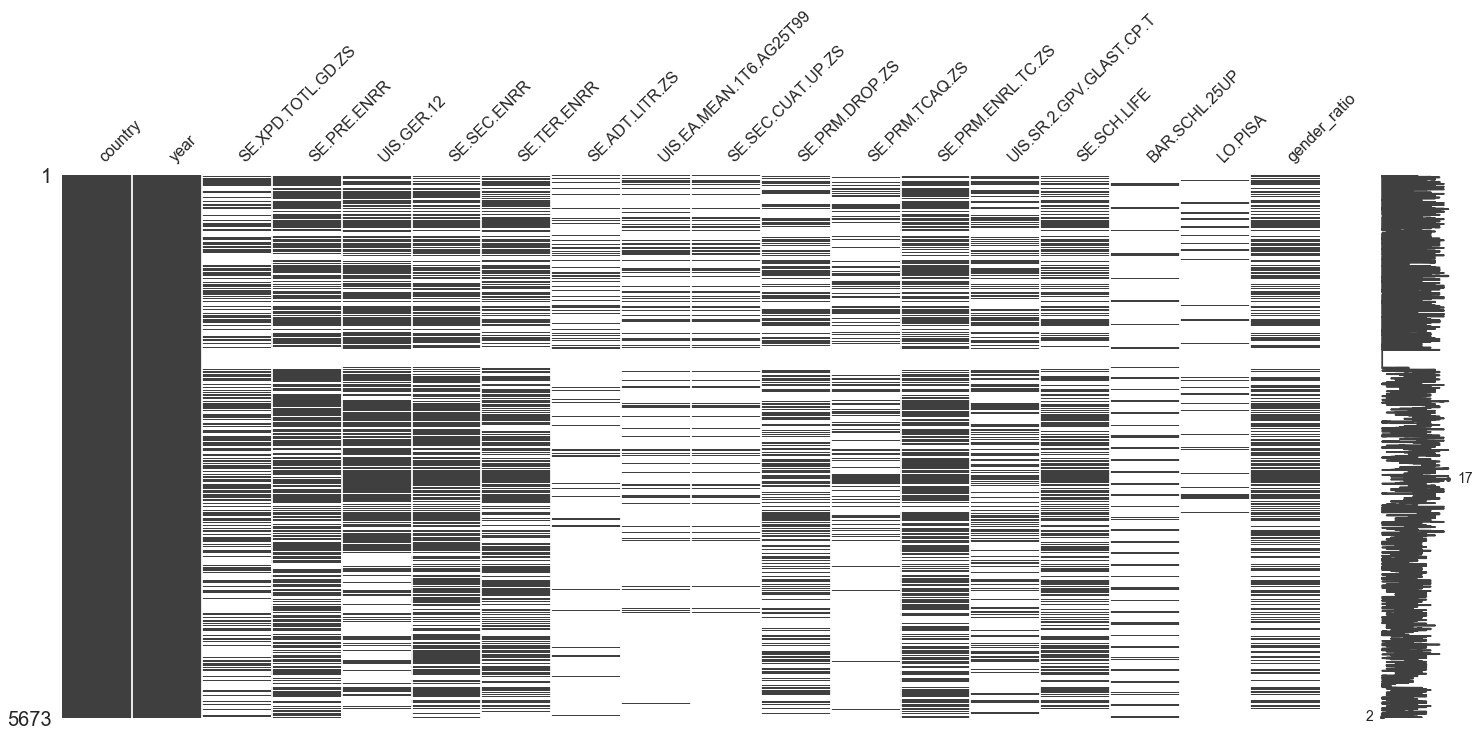

In [74]:
import missingno as msno
msno.matrix(worldbank_data_idx)

In [76]:
#import pandas_profiling
#pandas_profiling.ProfileReport(worldbank_data_idx)

In [282]:
#Treating the missing data
import numpy as np
from fancyimpute import KNN, SoftImpute, IterativeImputer, BiScaler, NuclearNormMinimization, IterativeSVD  
worldbank_data_ind = worldbank_data_idx.set_index('country')
worldbank_data_ind["country"] = worldbank_data_ind.index
worldbank_data_hotenco = pd.get_dummies(worldbank_data_ind, columns=["country"])
worldbank_data_hotenco.replace([np.inf, -np.inf], np.nan, inplace = True)
worldbank_data_filled = pd.DataFrame(IterativeImputer().fit_transform(worldbank_data_hotenco))
worldbank_data_filled.columns = worldbank_data_hotenco.columns
worldbank_data_filled["country"] = worldbank_data_idx["country"]
worldbank_data_filled.set_index("country", inplace = True)
worldbank_data_filled = worldbank_data_filled[worldbank_data_filled.columns.drop(list(worldbank_data_filled.filter(regex='country')))]


In [387]:
#scaling
import pandas as pd
from sklearn import preprocessing

x = worldbank_data_filled.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler() #min-max

nonlinear_scaler = preprocessing.QuantileTransformer(random_state=0) #non linear

x_scaled = nonlinear_scaler.fit_transform(x) # change between min_max or non linear

#worldbank_data_scaled = worldbank_data_filled*1./np.max(worldbank_data_filled, axis=0) #divide my column max

worldbank_data_scaled = pd.DataFrame(x_scaled, columns = worldbank_data_filled.columns) #max-min or non linear

worldbank_data_scaled["year"] = worldbank_data_filled["year"].values.astype(int)
worldbank_data_scaled["country"] = worldbank_data_filled.index
worldbank_data_scaled.set_index(["country",'year'], inplace = True)

#Taking the mean to build our indicator
worldbank_data_scaled["indicator"] = worldbank_data_scaled.mean(axis=1)

#Or Median
#worldbank_data_scaled["indicator"] = worldbank_data_scaled.median(axis=1)

#Or it can be done by using PCA first component weight (no big differences)

#from sklearn.decomposition import PCA
pca = PCA(n_components=1)
#worldbank_data_scaled["indicator"] = pca.fit_transform(worldbank_data_scaled)




worldbank_data_scaled.reset_index(inplace = True)
worldbank_data_scaled.year = worldbank_data_scaled.year.astype(int)
merged_data = pd.merge(worldbank_data_scaled, education_hdi_calc, on = ["country", "year"])


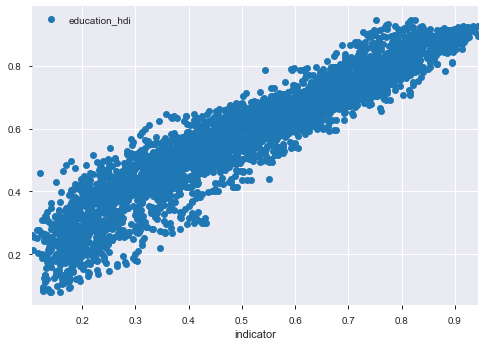

In [388]:
merged_data.plot(x='indicator', y='education_hdi', style='o')


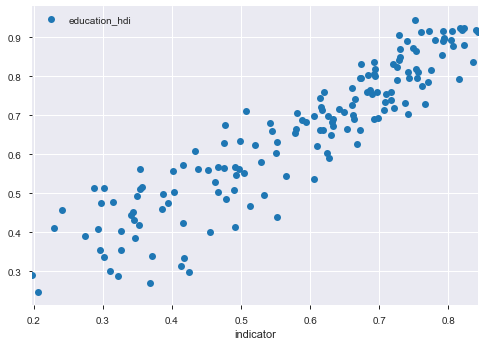

In [389]:
merged_data[merged_data["year"] == 2018].plot(x='indicator', y='education_hdi', style='o')


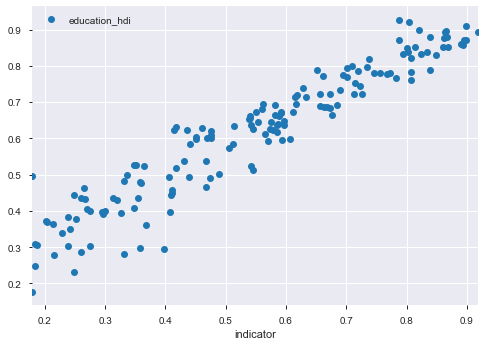

In [390]:
merged_data[merged_data["year"] == 2010].plot(x='indicator', y='education_hdi', style='o')


In [391]:
merged_data[merged_data["year"] == 2016].nlargest(10, 'indicator')

country  year  SE.XPD.TOTL.GD.ZS  SE.PRE.ENRR  UIS.GER.12  \
353       Denmark  2016           0.920916     0.917849    0.905664   
1210       Sweden  2016           0.935726     0.903999    0.997364   
56      Australia  2016           0.723890     0.994875    0.916793   
958        Norway  2016           0.945007     0.918250    0.726909   
92        Belgium  2016           0.888037     0.988661    0.994541   
407       Estonia  2016           0.705713     0.888883    0.653847   
976   New Zealand  2016           0.878879     0.882990    0.662723   
614        Israel  2016           0.819649     0.983969    0.871103   
605       Iceland  2016           0.927671     0.913325    0.622777   
425       Finland  2016           0.906853     0.815665    0.705988   

      SE.SEC.ENRR  SE.TER.ENRR  SE.ADT.LITR.ZS  UIS.EA.MEAN.1T6.AG25T99  \
353      0.989000     0.975990        0.872100                 0.980616   
1210     0.994011     0.912678        0.985220                 0.971699   
56       0.996043     0.999217        0.987318                 0.969033   
958      0.968903     0.973824        0.978563                 0.983360   
92       0.999324     0.961867        0.966138                 0.958161   
407      0.964953     0.948429        0.933429                 0.996929   
976      0.962701     0.977476        0.981524                 0.987919   
614      0.914455     0.919662        0.997875                 0.935960   
605      0.973085     0.954963        0.873009                 0.908255   
425      0.995841     0.986024        0.668505                 0.937918   

      SE.SEC.CUAT.UP.ZS  ...  SE.SCH.LIFE  BAR.SCHL.25UP   LO.PISA  \
353            0.951899  ...     0.995217       0.948752  0.884068   
1210           0.933878  ...     0.992937       0.983322  0.751754   
56             0.939872  ...     0.999898       0.992026  0.960938   
958            0.950882  ...     0.985129       0.985014  0.865977   
92             0.874377  ...     0.998923       0.938953  0.872055   
407            0.988571  ...     0.930817       0.986913  0.899810   
976            0.898710  ...     0.986580       0.990192  0.872174   
614            0.828285  ...     0.932395       0.993979  0.646560   
605            0.848687  ...     0.996214       0.876710  0.782784   
425            0.728892  ...     0.997090       0.903365  0.934823   

      gender_ratio  indicator      Country  variable  expected      mean  \
353       0.797889   0.936721      Denmark      2016  1.000000  0.840000   
1210      0.834036   0.932276       Sweden      2016  1.000000  0.826667   
56        0.547335   0.927413    Australia      2016  1.000000  0.840000   
958       0.745422   0.924261       Norway      2016  1.000000  0.840000   
92        0.693954   0.916789      Belgium      2016  1.000000  0.786667   
407       0.922365   0.911976      Estonia      2016  0.894444  0.873333   
976       0.705916   0.908765  New Zealand      2016  1.000000  0.840000   
614       0.902141   0.897597       Israel      2016  0.883333  0.866667   
605       0.964962   0.888260      Iceland      2016  1.000000  0.826667   
425       0.918195   0.888143      Finland      2016  1.000000  0.826667   

     education_hdi  
353       0.920000  
1210      0.913333  
56        0.920000  
958       0.920000  
92        0.893333  
407       0.883889  
976       0.920000  
614       0.875000  
605       0.913333  
425       0.913333  

[10 rows x 24 columns]

In [392]:
merged_data[merged_data["year"] == 2018].nlargest(10, 'education_hdi')

country  year  SE.XPD.TOTL.GD.ZS  SE.PRE.ENRR  UIS.GER.12  \
324          Germany  2018           0.521518     0.900412    0.396148   
54         Australia  2018           0.447350     0.884884    0.224488   
974      New Zealand  2018           0.853815     0.775933    0.351240   
351          Denmark  2018           0.907468     0.849755    0.395648   
956           Norway  2018           0.894658     0.802525    0.308240   
585          Ireland  2018           0.571755     0.957787    0.308038   
603          Iceland  2018           0.856743     0.847848    0.349595   
450   United Kingdom  2018           0.590054     0.774621    0.487485   
423          Finland  2018           0.823132     0.598200    0.291101   
1208          Sweden  2018           0.857531     0.776846    0.535831   

      SE.SEC.ENRR  SE.TER.ENRR  SE.ADT.LITR.ZS  UIS.EA.MEAN.1T6.AG25T99  \
324      0.740476     0.832554        0.948892                 0.998996   
54       0.942837     0.920850        0.939203                 0.972248   
974      0.857862     0.889359        0.858110                 0.953647   
351      0.847261     0.867744        0.739704                 0.982522   
956      0.825678     0.885451        0.869482                 0.945543   
585      0.813606     0.842903        0.789150                 0.868844   
603      0.780905     0.850265        0.711361                 0.924146   
450      0.772259     0.838709        0.622513                 0.949941   
423      0.875603     0.933030        0.453434                 0.935700   
1208     0.897899     0.839765        0.789829                 0.940169   

      SE.SEC.CUAT.UP.ZS  ...  SE.SCH.LIFE  BAR.SCHL.25UP   LO.PISA  \
324            0.977895  ...     0.839154       0.966200  0.851437   
54             0.952976  ...     0.863279       0.980993  0.844764   
974            0.742864  ...     0.869908       0.982068  0.864848   
351            0.959130  ...     0.768206       0.938338  0.853848   
956            0.857943  ...     0.829815       0.975931  0.832748   
585            0.842210  ...     0.821335       0.968703  0.872580   
603            0.885938  ...     0.902005       0.860149  0.716486   
450            0.866967  ...     0.832343       0.936236  0.868503   
423            0.774375  ...     0.790355       0.855506  0.911224   
1208           0.880797  ...     0.786176       0.979038  0.863244   

      gender_ratio  indicator         Country  variable  expected      mean  \
324       0.304161   0.751661         Germany      2018  0.950000  0.940000   
54        0.434434   0.816699       Australia      2018  1.000000  0.846667   
974       0.444027   0.822217     New Zealand      2018  1.000000  0.846667   
351       0.722709   0.840374         Denmark      2018  1.000000  0.840000   
956       0.529149   0.820283          Norway      2018  1.000000  0.840000   
585       0.607090   0.792427         Ireland      2018  1.000000  0.833333   
603       0.754612   0.804685         Iceland      2018  1.000000  0.833333   
450       0.523231   0.772190  United Kingdom      2018  0.966667  0.866667   
423       0.698341   0.759755         Finland      2018  1.000000  0.826667   
1208      0.733862   0.842921          Sweden      2018  1.000000  0.826667   

     education_hdi  
324       0.945000  
54        0.923333  
974       0.923333  
351       0.920000  
956       0.920000  
585       0.916667  
603       0.916667  
450       0.916667  
423       0.913333  
1208      0.913333  

[10 rows x 24 columns]

In [393]:
merged_data.corr()


year  SE.XPD.TOTL.GD.ZS  SE.PRE.ENRR  UIS.GER.12  \
year                     1.000000           0.098122     0.217900    0.246705   
SE.XPD.TOTL.GD.ZS        0.098122           1.000000     0.343937    0.325381   
SE.PRE.ENRR              0.217900           0.343937     1.000000    0.445632   
UIS.GER.12               0.246705           0.325381     0.445632    1.000000   
SE.SEC.ENRR              0.190682           0.370428     0.664081    0.587825   
SE.TER.ENRR              0.306787           0.268205     0.612818    0.417494   
SE.ADT.LITR.ZS           0.216224           0.319005     0.618429    0.454714   
UIS.EA.MEAN.1T6.AG25T99  0.232378           0.352254     0.617030    0.371871   
SE.SEC.CUAT.UP.ZS        0.225726           0.180991     0.386031    0.124010   
SE.PRM.DROP.ZS           0.121782           0.245514     0.466398    0.211182   
SE.PRM.TCAQ.ZS           0.163370           0.386829     0.363436    0.247795   
SE.PRM.ENRL.TC.ZS        0.150875           0.384883     0.641794    0.430243   
UIS.SR.2.GPV.GLAST.CP.T  0.145128           0.170333     0.451264    0.190496   
SE.SCH.LIFE              0.330706           0.391580     0.672716    0.683254   
BAR.SCHL.25UP            0.283556           0.342421     0.614481    0.370467   
LO.PISA                  0.033656           0.079233     0.329108   -0.100551   
gender_ratio             0.042194           0.309422     0.406439    0.438345   
indicator                0.262745           0.476160     0.754322    0.542604   
expected                 0.288921           0.408041     0.673227    0.636746   
mean                     0.232531           0.357272     0.650641    0.441881   
education_hdi            0.269426           0.396660     0.688675    0.554292   

                         SE.SEC.ENRR  SE.TER.ENRR  SE.ADT.LITR.ZS  \
year                        0.190682     0.306787        0.216224   
SE.XPD.TOTL.GD.ZS           0.370428     0.268205        0.319005   
SE.PRE.ENRR                 0.664081     0.612818        0.618429   
UIS.GER.12                  0.587825     0.417494        0.454714   
SE.SEC.ENRR                 1.000000     0.797161        0.825332   
SE.TER.ENRR                 0.797161     1.000000        0.734786   
SE.ADT.LITR.ZS              0.825332     0.734786        1.000000   
UIS.EA.MEAN.1T6.AG25T99     0.805517     0.726471        0.835613   
SE.SEC.CUAT.UP.ZS           0.538043     0.495144        0.565500   
SE.PRM.DROP.ZS              0.610764     0.581015        0.582481   
SE.PRM.TCAQ.ZS              0.449726     0.438941        0.429306   
SE.PRM.ENRL.TC.ZS           0.795517     0.691282        0.774076   
UIS.SR.2.GPV.GLAST.CP.T     0.590379     0.541886        0.566667   
SE.SCH.LIFE                 0.883718     0.817399        0.728224   
BAR.SCHL.25UP               0.800553     0.729631        0.820070   
LO.PISA                     0.224253     0.216119       -0.002443   
gender_ratio                0.554009     0.476096        0.565592   
indicator                   0.918181     0.834692        0.858016   
expected                    0.877880     0.808437        0.787751   
mean                        0.854226     0.771856        0.894564   
education_hdi               0.901268     0.821696        0.880368   

                         UIS.EA.MEAN.1T6.AG25T99  SE.SEC.CUAT.UP.ZS  \
year                                    0.232378           0.225726   
SE.XPD.TOTL.GD.ZS                       0.352254           0.180991   
SE.PRE.ENRR                             0.617030           0.386031   
UIS.GER.12                              0.371871           0.124010   
SE.SEC.ENRR                             0.805517           0.538043   
SE.TER.ENRR                             0.726471           0.495144   
SE.ADT.LITR.ZS                          0.835613           0.565500   
UIS.EA.MEAN.1T6.AG25T99                 1.000000           0.735838   
SE.SEC.CUAT.UP.ZS                       0.735838           1.000000   
SE.PRM.DROP.ZS   

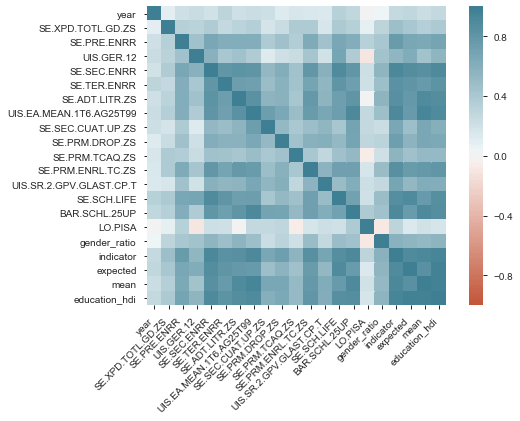

In [394]:
import seaborn as sns
corr = merged_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [395]:
#Indicators
#Government expenditure on education (% of GDP),
#Gross enrolment ratio, pre-primary (% of preschool-age children),
#Gross enrolment ratio, primary (% of primary school-age population),
#Gross enrolment ratio, secondary (% of secondary school-age population),
#Gross enrolment ratio, tertiary (% of tertiary school-age population),
#Literacy rate, adult (% ages 15 and older),
#Mean years of schooling (years),(this and the expected years of schooling compose the education hdi)
#Mean years of schooling, female (years),
#Mean years of schooling, male (years), (this could be used to create a third variable, indicating the difference between genders)
#Percentage of primary schools with access to the internet ,
#Percentage of secondary schools with access to the internet ,
#Population with at least some secondary education (% ages 25 and older),
#Population with at least some secondary education, female (% ages 25 and older),
#Population with at least some secondary education, male (% ages 25 and older),
#Primary school dropout rate (% of primary school cohort),
#Primary school teachers trained to teach (%),
#Programme for International Student Assessment (PISA) score in mathematics,
#Programme for International Student Assessment (PISA) score in reading,
#Programme for International Student Assessment (PISA) score in science,
#Pupil-teacher ratio, primary school (number of pupils per teacher),
#Survival rate to the last grade of lower secondary general education (%),


In [397]:
#individual graph
import plotly.express as px

merged_data['indicator_minmax'] = merged_data.groupby('year')['indicator'].apply(lambda x: (x-min(x))/(max(x)-min(x)))


merged_data = merged_data[merged_data["year"] < 2020]

fig = px.line(merged_data[merged_data["country"] == "Australia"], x='year', y='indicator_minmax')
fig.show()

In [399]:
#aggregated index

aggregated_data = merged_data.groupby('year').mean()
aggregated_data = aggregated_data.reset_index()

fig = px.line(aggregated_data, y='indicator', x = "year")
fig.show()

In [403]:
merged_data.set_index("year")

lista = merged_data["country"].unique()

import plotly.express as px
import plotly.graph_objects as go

for iso in lista:

    merged_data_c = merged_data[merged_data["country"] == iso]
    
    merged_data_c.reset_index(inplace = True)

    fig = go.Figure()


    fig.add_trace(go.Scatter(
                    x=merged_data_c["year"],
                    y=merged_data_c['indicator'],
                    name="Indicator",
                    line_color='green',
                    opacity=1,
                    line=dict(color='deepskyblue', width=4
                                  )))
    fig.add_trace(go.Scatter(
                    x=merged_data_c["year"],
                    y=merged_data_c['education_hdi'],
                    name="Education_hdi",
                    line_color='rgb(264, 45, 45)',
                    opacity=1,
                    line=dict(color='deepskyblue', width=4
                                  )))

    fig.update_layout(
        autosize=False,
        width=1000,
        height=600)


    fig.write_image(iso + "education_indi.png")